<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,0.000955,309.881269,309.879926,0.001344
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-0.000201,278.580437,278.580946,-0.000509
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,0.000213,301.786766,301.786601,0.000164
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,0.002060,250.373468,250.369978,0.003490
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-0.000491,282.434313,282.435096,-0.000783
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,0.003210,246.446716,246.443811,0.002905
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.000056,221.916202,221.916510,-0.000307
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-0.006039,195.634770,195.640989,-0.006219
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,0.001649,250.362904,250.361518,0.001386


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.589565  58.173330  65.297223  80.820196  0.000955  309.881269   
      1.0    74.209138  82.578290  28.203447  83.589763 -0.000201  278.580437   
      2.0    74.440595  77.174084  87.998186  52.173688  0.000213  301.786766   
      3.0    59.576364  39.421436  51.066458  90.307151  0.002060  250.373468   
      4.0    52.408322  92.697621  74.591867  52.736995 -0.000491  282.434313   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218  0.003210  246.446716   
      116.0  68.877186  68.071497  36.382901  38.584562  0.000056  221.916202   
      117.0  55.674499  22.480327  42.561396  64.924587 -0.006039  195.634770   
      118.0  54.467314  86.504460  59.801669  39.587811  0.001649  250.362904   
      119.0  48.300491  78.745786  87.003310  53.635468  0.000365  277.685420   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    309.879926  0.001344  
      1.0    278.580946 -0.000509  
      2.0    301.786601  0.000164  
      3.0    250.369978  0.003490  
      4.0    282.435096 -0.000783  
...                 ...       ...  
999.0 115.0  246.443811  0.002905  
      116.0  221.916510 -0.000307  
      117.0  195.640989 -0.006219  
      118.0  250.361518  0.001386  
      119.0  277.685093  0.000326  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.589565  58.173330  65.297223  80.820196  0.000955  309.881269   
      1.0    74.209138  82.578290  28.203447  83.589763 -0.000201  278.580437   
      2.0    74.440595  77.174084  87.998186  52.173688  0.000213  301.786766   
      3.0    59.576364  39.421436  51.066458  90.307151  0.002060  250.373468   
      4.0    52.408322  92.697621  74.591867  52.736995 -0.000491  282.434313   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218  0.003210  246.446716   
      116.0  68.877186  68.071497  36.382901  38.584562  0.000056  221.916202   
      117.0  55.674499  22.480327  42.561396  64.924587 -0.006039  195.634770   
      118.0  54.467314  86.504460  59.801669  39.587811  0.001649  250.362904   
      119.0  48.300491  78.745786  87.003310  53.635468  0.000365  277.685420   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    309.879926  0.001344  
      1.0    278.580946 -0.000509  
      2.0    301.786601  0.000164  
      3.0    250.369978  0.003490  
      4.0    282.435096 -0.000783  
...                 ...       ...  
999.0 115.0  246.443811  0.002905  
      116.0  221.916510 -0.000307  
      117.0  195.640989 -0.006219  
      118.0  250.361518  0.001386  
      119.0  277.685093  0.000326  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,0.000955,309.881269,309.879926,0.001344
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-0.000201,278.580437,278.580946,-0.000509
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,0.000213,301.786766,301.786601,0.000164
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,0.002060,250.373468,250.369978,0.003490
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-0.000491,282.434313,282.435096,-0.000783
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,0.003210,246.446716,246.443811,0.002905
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.000056,221.916202,221.916510,-0.000307
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-0.006039,195.634770,195.640989,-0.006219
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,0.001649,250.362904,250.361518,0.001386


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.589565  58.173330  65.297223  80.820196  0.000955  309.881269   
      1.0    74.209138  82.578290  28.203447  83.589763 -0.000201  278.580437   
      2.0    74.440595  77.174084  87.998186  52.173688  0.000213  301.786766   
      3.0    59.576364  39.421436  51.066458  90.307151  0.002060  250.373468   
      4.0    52.408322  92.697621  74.591867  52.736995 -0.000491  282.434313   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218  0.003210  246.446716   
      116.0  68.877186  68.071497  36.382901  38.584562  0.000056  221.916202   
      117.0  55.674499  22.480327  42.561396  64.924587 -0.006039  195.634770   
      118.0  54.467314  86.504460  59.801669  39.587811  0.001649  250.362904   
      119.0  48.300491  78.745786  87.003310  53.635468  0.000365  277.685420   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    309.879926  0.001344  
      1.0    278.580946 -0.000509  
      2.0    301.786601  0.000164  
      3.0    250.369978  0.003490  
      4.0    282.435096 -0.000783  
...                 ...       ...  
999.0 115.0  246.443811  0.002905  
      116.0  221.916510 -0.000307  
      117.0  195.640989 -0.006219  
      118.0  250.361518  0.001386  
      119.0  277.685093  0.000326  

[120000 rows x 8 columns]

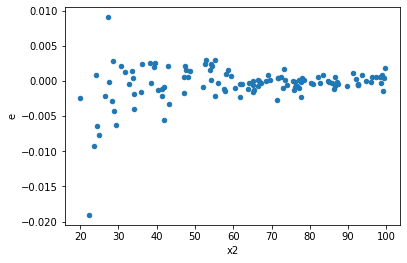

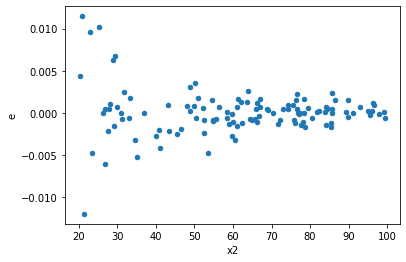

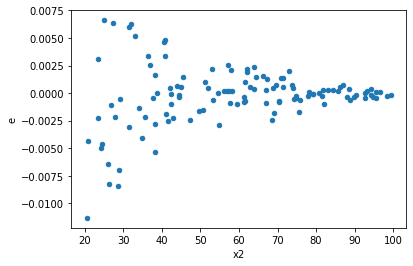

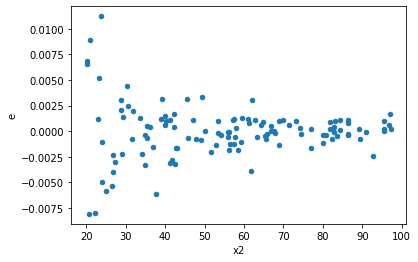

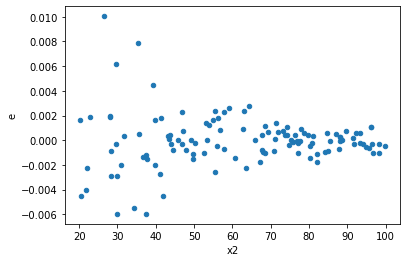

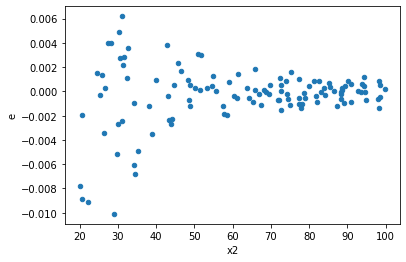

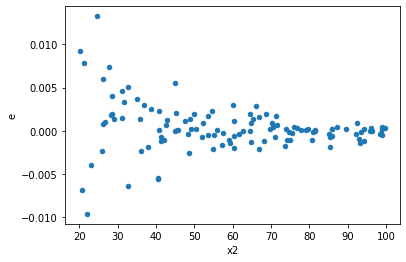

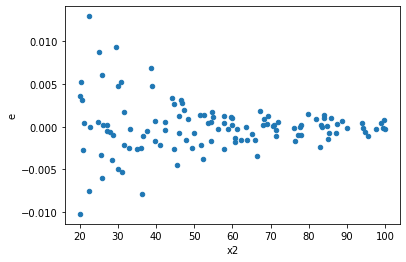

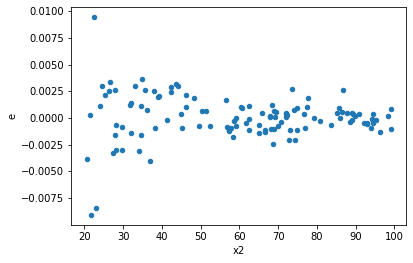

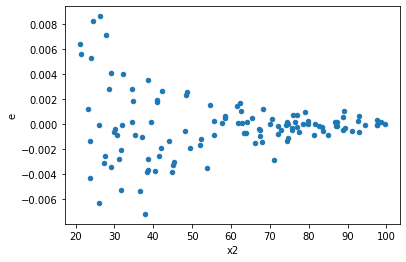

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,59.0,53.0,0.00023529297330213164,0.0006229538742871195,3.988016496646299e-06,1.1753846684662632e-05,2.947291390230448,0.00010055371260242474,0.9999497231436988,5.027685630121237e-05,Reject001=0 : Heteroscedasticity
2.0,53.0,59.0,0.000328757699557383,0.00045243168977569884,6.202975463346849e-06,7.668333725011845e-06,1.2362347344953633,0.4269802676731269,0.7865098661634365,0.21349013383656346,Reject001=1 : Homoscedasticity
3.0,60.0,52.0,0.00033293288380793003,0.0004025420675193416,5.548881396798834e-06,7.741193606141186e-06,1.3950908394991293,0.2213112048642658,0.8893443975678671,0.1106556024321329,Reject001=1 : Homoscedasticity
4.0,52.0,60.0,0.0001631024061317103,0.0003482369079910656,3.136584733302121e-06,5.803948466517761e-06,1.8504038500523794,0.021920149221590357,0.9890399253892048,0.010960074610795179,Reject001=1 : Homoscedasticity
5.0,70.0,42.0,0.0002761746702035529,0.00031412054719512215,3.945352431479327e-06,7.479060647502908e-06,1.8956635122958083,0.027288343900396805,0.9863558280498016,0.013644171950198403,Reject001=1 : Homoscedasticity
7.0,58.0,54.0,0.0002360489033548423,0.0008310446248753526,4.069808678531764e-06,1.5389715275469494e-05,3.7814345811021104,2.0472391850656635e-06,0.9999989763804075,1.0236195925328317e-06,Reject001=0 : Heteroscedasticity
9.0,55.0,57.0,0.00020175979802984566,0.0004807729232440469,3.668359964179012e-06,8.43461268849205e-06,2.2992870849248126,0.0021628782138605196,0.9989185608930697,0.0010814391069302598,Reject001=0 : Heteroscedasticity
10.0,55.0,57.0,4.6300664204377914e-05,0.001164944354231415,8.418302582614166e-07,2.043762024967395e-05,24.277602342166443,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,46.0,66.0,3.651271010309834e-05,0.0006150017002329792,7.937545674586595e-07,9.318207579287565e-06,11.739406563821603,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,49.0,63.0,0.0005591985925958952,0.00015980628349328925,1.1412216175426433e-05,2.536607674496655e-06,0.2222712605075474,2.301434533433663e-07,Reject001=0 : Heteroscedasticity
1.0,59.0,53.0,0.00023529297330213164,0.0006229538742871195,3.988016496646299e-06,1.1753846684662632e-05,2.947291390230448,0.00010055371260242474,Reject001=0 : Heteroscedasticity
2.0,53.0,59.0,0.000328757699557383,0.00045243168977569884,6.202975463346849e-06,7.668333725011845e-06,1.2362347344953633,0.4269802676731269,Reject001=1 : Homoscedasticity
3.0,60.0,52.0,0.00033293288380793003,0.0004025420675193416,5.548881396798834e-06,7.741193606141186e-06,1.3950908394991293,0.2213112048642658,Reject001=1 : Homoscedasticity
4.0,52.0,60.0,0.0001631024061317103,0.0003482369079910656,3.136584733302121e-06,5.803948466517761e-06,1.8504038500523794,0.021920149221590357,Reject001=1 : Homoscedasticity
5.0,70.0,42.0,0.0002761746702035529,0.00031412054719512215,3.945352431479327e-06,7.479060647502908e-06,1.8956635122958083,0.027288343900396805,Reject001=1 : Homoscedasticity
6.0,61.0,51.0,0.0005109415095652061,0.0002246393654757941,8.376090320741084e-06,4.404693440701845e-06,0.5258650840708861,0.016622806583803464,Reject001=1 : Homoscedasticity
7.0,58.0,54.0,0.0002360489033548423,0.0008310446248753526,4.069808678531764e-06,1.5389715275469494e-05,3.7814345811021104,2.0472391850656635e-06,Reject001=0 : Heteroscedasticity
8.0,55.0,57.0,0.00039933457297129226,8.6073301359006e-05,7.260628599478041e-06,1.5100579185790527e-06,0.2079789508428525,2.6897818943059996e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    559
Reject001=1 : Homoscedasticity      441
Name: Result_test, dtype: int64